In [1]:
# 0. 사용할 패키지 불러오기
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import os

In [2]:
# 1. 데이터셋 생성하기
# 데이터셋 불러오기
data = pd.read_csv('./dataset/iris.csv.gz', header=None)
print(data.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [3]:
# 훈련셋과 검증셋 분리
X = data.iloc[:, 0:4]
y = data.iloc[:, 4]

print(set(y))

{'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


In [4]:

# 원핫 인코딩으로 바꿔준다

e = LabelEncoder()
e.fit(y)
y = e.transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

(120, 4)
(120, 3)


In [5]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:

model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_filepath = model_dir + 'iris.h5'
checkpointer = ModelCheckpoint(filepath=model_filepath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습의 자동중단! 3번동안 나아지지 않으면 stop!
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [8]:
# 4. 모델 학습시키기
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=10, callbacks=[checkpointer, early_stop])

Epoch 1/200
 1/12 [=>............................] - ETA: 0s - loss: 1.2342 - accuracy: 0.3000
Epoch 00001: val_loss improved from inf to 1.04062, saving model to ./model\iris.h5
12/12 [==============================] - 0s 26ms/step - loss: 1.0914 - accuracy: 0.3333 - val_loss: 1.0406 - val_accuracy: 0.3333
Epoch 2/200
10/12 [========================>.....] - ETA: 0s - loss: 1.0304 - accuracy: 0.3300
Epoch 00002: val_loss improved from 1.04062 to 1.00409, saving model to ./model\iris.h5
12/12 [==============================] - 0s 13ms/step - loss: 1.0251 - accuracy: 0.3333 - val_loss: 1.0041 - val_accuracy: 0.3333
Epoch 3/200
 1/12 [=>............................] - ETA: 0s - loss: 0.9659 - accuracy: 0.4000
Epoch 00003: val_loss improved from 1.00409 to 0.97429, saving model to ./model\iris.h5
12/12 [==============================] - 0s 7ms/step - loss: 0.9915 - accuracy: 0.3333 - val_loss: 0.9743 - val_accuracy: 0.3333
Epoch 4/200
 1/12 [=>............................] - ETA: 0s - los

 1/12 [=>............................] - ETA: 0s - loss: 0.4557 - accuracy: 1.0000
Epoch 00027: val_loss improved from 0.41488 to 0.40423, saving model to ./model\iris.h5
12/12 [==============================] - 0s 10ms/step - loss: 0.4362 - accuracy: 0.8917 - val_loss: 0.4042 - val_accuracy: 0.9000
Epoch 28/200
 1/12 [=>............................] - ETA: 0s - loss: 0.5483 - accuracy: 0.8000
Epoch 00028: val_loss improved from 0.40423 to 0.39532, saving model to ./model\iris.h5
12/12 [==============================] - 0s 8ms/step - loss: 0.4245 - accuracy: 0.9167 - val_loss: 0.3953 - val_accuracy: 0.9333
Epoch 29/200
 1/12 [=>............................] - ETA: 0s - loss: 0.3126 - accuracy: 1.0000
Epoch 00029: val_loss improved from 0.39532 to 0.38409, saving model to ./model\iris.h5
12/12 [==============================] - 0s 8ms/step - loss: 0.4144 - accuracy: 0.9250 - val_loss: 0.3841 - val_accuracy: 0.9333
Epoch 30/200
 1/12 [=>............................] - ETA: 0s - loss: 0.4

 1/12 [=>............................] - ETA: 0s - loss: 0.2760 - accuracy: 1.0000
Epoch 00053: val_loss improved from 0.23125 to 0.22616, saving model to ./model\iris.h5
12/12 [==============================] - 0s 8ms/step - loss: 0.2297 - accuracy: 0.9833 - val_loss: 0.2262 - val_accuracy: 0.9667
Epoch 54/200
 1/12 [=>............................] - ETA: 0s - loss: 0.2827 - accuracy: 1.0000
Epoch 00054: val_loss improved from 0.22616 to 0.22578, saving model to ./model\iris.h5
12/12 [==============================] - 0s 8ms/step - loss: 0.2289 - accuracy: 0.9667 - val_loss: 0.2258 - val_accuracy: 0.9667
Epoch 55/200
 1/12 [=>............................] - ETA: 0s - loss: 0.2821 - accuracy: 0.8000
Epoch 00055: val_loss improved from 0.22578 to 0.21665, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.2287 - accuracy: 0.9583 - val_loss: 0.2167 - val_accuracy: 0.9667
Epoch 56/200
 1/12 [=>............................] - ETA: 0s - loss: 0.17

Epoch 00080: val_loss improved from 0.14425 to 0.14396, saving model to ./model\iris.h5
12/12 [==============================] - 0s 11ms/step - loss: 0.1110 - accuracy: 0.9750 - val_loss: 0.1440 - val_accuracy: 0.9667
Epoch 81/200
 1/12 [=>............................] - ETA: 0s - loss: 0.1122 - accuracy: 1.0000
Epoch 00081: val_loss improved from 0.14396 to 0.14201, saving model to ./model\iris.h5
12/12 [==============================] - 0s 9ms/step - loss: 0.1103 - accuracy: 0.9833 - val_loss: 0.1420 - val_accuracy: 0.9667
Epoch 82/200
 1/12 [=>............................] - ETA: 0s - loss: 0.1566 - accuracy: 1.0000
Epoch 00082: val_loss did not improve from 0.14201
12/12 [==============================] - 0s 8ms/step - loss: 0.1157 - accuracy: 0.9750 - val_loss: 0.1505 - val_accuracy: 0.9667
Epoch 83/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0524 - accuracy: 1.0000
Epoch 00083: val_loss improved from 0.14201 to 0.13580, saving model to ./model\iris.h5
12/12 [==

In [9]:
# 6. 모델 평가하기
print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 0.9667
정확도 : 0.97 


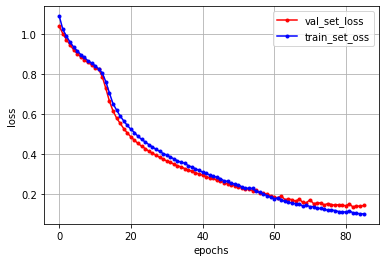

In [10]:
# 5. 학습과정 살펴보기
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

잘 학습되는 것을 볼 수 있다.